<a href="https://colab.research.google.com/github/paulosrl/NotebooksGoogleColab/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados_Limpeza_de_dados%2C_outliers_e_valores_ausentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Limpando os dados e detectando *Outliers* utilizando a biblioteca Pandas do Python**

Entre as habilidades básicas de um Cientista de Dados, podemos destacar:

* Lidar com valores ausentes;

* Lidar com outliers;

* Transformar os dados.

Antes de começar qualquer análise é necessário **validar os dados**, este processo permitirá ao analista conhecer **melhor** os dados que serão analisados.

Esta validação é de extrema importância, pois a **qualidade dos dados** irá impactar **diretamente** na **qualidade da análise** e consequentemente na sua **visualização**, inclusive para construção de modelos de algoritmos que irão utilizar conceitos de aprendizado de máquina (*Machine Learning*).

**O processo de análise dos dados, consiste em analisar:**

* **O Tipo de Dados**
  * Ex: Coluna de data deve estar em formato `datetime`, coluna de valores monetários deve estar no formato `float`.
* **O intervalo dos Dados**
  * Ex: Meses de 1 a 12, dias do mês de 1 a 31.
* **Quais os dados que são obrigatórios**
  * Ex: Algumas colunas não podem estar vazias
* **Quais os dados que são únicos**
  * Ex: CPF, RG, CNPJ, ID de usuário.
* **Quais os dados categóricos**
  * Ex: Gênero Masculino ou Feminino.
* **Os dados estão no padrão esperado**
  * Ex: (61) 98765-4321
* **A validade entre os campos que compõem a base de dados**
  * Ex: Data de saída não poder ser anterior à data de entrada.

Artigo recomendado:

https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

### **Importando os dados e as bibliotecas**

Nesta seção iremos importar as bibliotecas que serão utilizadas nesta análise.

In [ ]:
# importar a biblioteca pandas e matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math # biblioteca para cálculos matemáticos
import seaborn as sns # biblioteca para apresentação visual
plt.style.use('dark_background')

####**Tramento dos dados ausentes em um dataset**

Para esse estudo, faremos o tratamento dos dados do **Airbnb** referentes à cidade de **Nova Iorque**.



In [ ]:
# importando os dados
df = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/eds_outliers/master/nyc.csv', index_col=0)

## **Análise inicial dos Dados**

Antes da análise do dataset, é importante conhecer as primeiras características do mesmo, desta forma, os comandos a seguir irão listas o total de colunas e linhas que possui o dataset

### **Dimensão do Dataframe**

Os comandos a seguir permitem analisar as dimensões do dataset que será analisado.

In [ ]:
# verificar o tamanho do DataFrame
print("Colunas: ", df.shape[1])
print("Linhas: ", df.shape[0])

Colunas:  16
Linhas:  49530


###**Nomes das colunas que compoem o Dataframe**

In [ ]:
# imprimir os nomes das colunas
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

###**Tipos de dados das Colunas**

In [ ]:
# verificando os tipos das colunas
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

###**Listagem das 5 primeiras linhas do arquivo**

In [ ]:
# visualizando as 5 primeiras linhas do DataFrame
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2060,Modern NYC,2259,Jenny,Manhattan,Washington Heights,40.85722,-73.93790,Private room,100,1,1,2008-09-22,0.01,1,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,3,48,2019-11-04,0.37,2,335


###**Listagem das 5 útimas linhas do arquivo**

In [ ]:
#imprimindo as 5 últimas linhas
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
49525,43702714,Spacious and Luxurious Noho 3 Bedroom Apartment,18880232,Byron,Manhattan,East Village,40.729553,-73.990712,Entire home/apt,173,3,0,NaN,NaN,1,365
49526,43702765,2-bedroom entire place for you in Bushwick,804056,Philip,Brooklyn,Bushwick,40.697820,-73.913960,Entire home/apt,99,3,0,NaN,NaN,1,135
49527,43703128,"Simple Spacious Manhattan Room for 2Near 2,3 T...",137358866,Kaz,Manhattan,Harlem,40.812614,-73.942075,Private room,49,28,0,NaN,NaN,160,8
49528,43703156,Cosy Room Available in East Village,26846438,Marine,Manhattan,Civic Center,40.713753,-74.005350,Private room,94,2,0,NaN,NaN,1,12
49529,43703359,A+ Location Deluxe Studio (Queen Bed & Futon),348619646,Nomad,Manhattan,Midtown,40.747453,-73.988046,Entire home/apt,249,1,0,NaN,NaN,4,230


## **Dados Ausentes**

Algumas análises devem ser feitas para lidar com dados ausentes

* Que tipo de dado está ausente?
* Em qual proporção?
* De forma aleatória?

Todos essas perguntas devem ser feitas e responidadas para o tratamento de dados ausentes.

Qual o motivo da ausência dos dados? De onde os dados são extraídos? Qual o processo de coleta de dadps? Dados ausentes implicam algum significado?

Uma possibilidade sobre a ausência dos dados é que estes só começaram a ser coletados a partir de uma determinada data.

###**Analisando o percentual de valores ausentes por coluna**


In [ ]:
# verificando a presença e porcentagem de dados ausentes no DataFrame,
# organizando do maior para o menor em relação ao total de linhas
print('Colunas         \t      Porcentagem de valores ausentes na coluna')
(df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem de valores ausentes na coluna


last_review                       22.85
reviews_per_month                 22.85
name                               0.04
host_name                          0.01
id                                 0.00
host_id                            0.00
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

## **Excluindo dados ausentes do dataset**

Neste momento, **após analisar** os dados é necessário decidir se serão ou não excluídas algumas colunas. Esta decisão deve ser tomada **após entender** os dados que estão sendo analisados, e decidir o que é **relevante** para análise e o que não é.

Decidida qual ou quais colunas serão excluídas, é necessário verificar **o que será feito com os valores ausentes** nas colunas que irão fazer parte da análise, ou seja, esses valores serão exclúidos do dataset ou serão substituídos por outro valor a decidir qual é.

Neste dataset, iremos excluir os valores faltantes pois eles representam um percentual muito baixo da amostra.


### **Excluindo as colunas com dados faltantes**

In [ ]:
# excluindo as colunas com dados faltantes
df.drop(columns=['reviews_per_month', 'last_review'], inplace=True)

In [ ]:
# verificando o dataset
print('Colunas         \t      Porcentagem')
(df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


name                              0.04
host_name                         0.01
id                                0.00
host_id                           0.00
neighbourhood_group               0.00
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
calculated_host_listings_count    0.00
availability_365                  0.00
dtype: float64

### **Excluindo as linhas com dados faltantes**

In [ ]:
# excluindo todas as linhas com dados faltantes
df.dropna(axis=0, inplace=True)

## **Analisando os dados após a remoção das linhas e colunas**

In [ ]:
print('Colunas         \t      Porcentagem')
(df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False).round(2)

Colunas         	      Porcentagem


id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

## **Outliers**

*Outliers* são pontos **discrepantes**, que estão **destoando** do padrão do conjunto de dados.

É  importante  **identificar** e **tratar** esses outliers, pois eles podem mostrar uma visão **distorcida** dos dados.

Podemos identificar um outlier de diversas formas, entre elas podemos citar:

* IQR Score
* Boxplots
* Scatter plots
* Z-Score

Vamos ver na prática o processo completo de limpeza de dados, tratando dados ausentes, convertendo os dados para o formato correto, e tratando dos outliers.
<p align="center"><img src="https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png
"></p>

Para esse estudo, faremos o tratamento dos dados do Airbnb referentes à cidade de Nova Iorque.

###**Analisando a distribuição estatística dos dados**

Para verificar a presença de outliers é necessário fazer um resumo estatístico dos dados.

In [ ]:
# verificando a distribuição estatística
#round(1), arredonda as casas decimais para uma unidade
df.describe().round(2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,49506.00,4.950600e+04,49506.00,49506.00,49506.00,49506.00,49506.00,49506.00,49506.00
mean,22965296.44,8.511890e+07,40.73,-73.95,162.66,8.17,23.88,6.24,126.70
std,13525679.12,9.889048e+07,0.05,0.05,419.41,21.52,48.26,25.49,142.38
min,2060.00,2.259000e+03,40.50,-74.24,0.00,1.00,0.00,1.00,0.00
25%,10875806.00,9.268318e+06,40.69,-73.98,68.00,2.00,1.00,1.00,0.00
50%,22338936.00,3.801608e+07,40.72,-73.96,101.00,3.00,5.00,1.00,79.00
75%,35578705.00,1.373589e+08,40.76,-73.93,175.00,6.00,23.00,2.00,267.00
max,43703359.00,3.490826e+08,40.91,-73.71,10000.00,1250.00,746.00,280.00,365.00


### **Selecionando os possíveis outliers**

1.   A variável **price** tem o **mínimo** em **0**. Lembrando que a variável **price** trata do preço da diária dos imóveis em moeda local (USD), estamos vendo que o **Q3** está em 175 dólares, mas o **máximo** está em **10 mil** dólares. A **média** da coluna **price** está em 162.6 dólares, enquanto a mediana (Q2) está em 101 dólares, observa-se que a média está muito próxima do terceiro quartil (Q3) dos dados (75% dos dados).

2.   A variável **minimum_nights** tem como seu **máximo** o valor **1250**, sendo que o **Q3** está em **6**;

3.   As variáveis **number_of_reviews**, **calculated_host_listings_count** e **availability_365** também podem conter outliers, mas não vamos nos preocupar com elas agora, para percerver esses valores discrepantes analise o valor dos 75% dos dados junto com o valor máximo dessas colunas.

### **Análise dos outliers**

1.   Preço **não pode** ser igual a **0**;
2.   75% dos dados tem preços das diárias (**price**) de até 175 dólares, será que existe uma diária de **10.000 dólares**, provavelmente este valor é um **outlier**?;
3.   A coluna minimum_nights mostra que 75% dos dados tem até 6 noites na variável **minimum_nights**, o valor de **1.250 noites** como máximo muito provavelmente é um **outlier**;

### **Análise gráfica dos outliers utilizando Histogramas**

Um histograma é uma visualização gráfica de dados usando barras de diferentes alturas. Em um histograma, cada barra agrupa números em intervalos. As barras mais altas mostram que mais dados estão nesse intervalo. Um histograma exibe a forma e distribuição de dados amostrais discretos ou contínuos. ([Kanacademy](https://pt.khanacademy.org/math/ap-statistics/quantitative-data-ap/histograms-stem-leaf/v/histograms-intro))

O [histograma](https://www.fm2s.com.br/histograma/) permite obter as seguintes informações

* Centralidade: qual é o centro de distribuição? Onde é esperado que esteja a maioria das observações?
* Amplitude: a distribuição normalmente contém observações entre quais valores? Qual é o ponto de máximo e o ponto de mínimo?
* Simetria: será que devemos esperar a mesma frequência de pontos com valor alto e com valor baixo? Será que o processo é simétrico ou valores mais altos são mais raros?

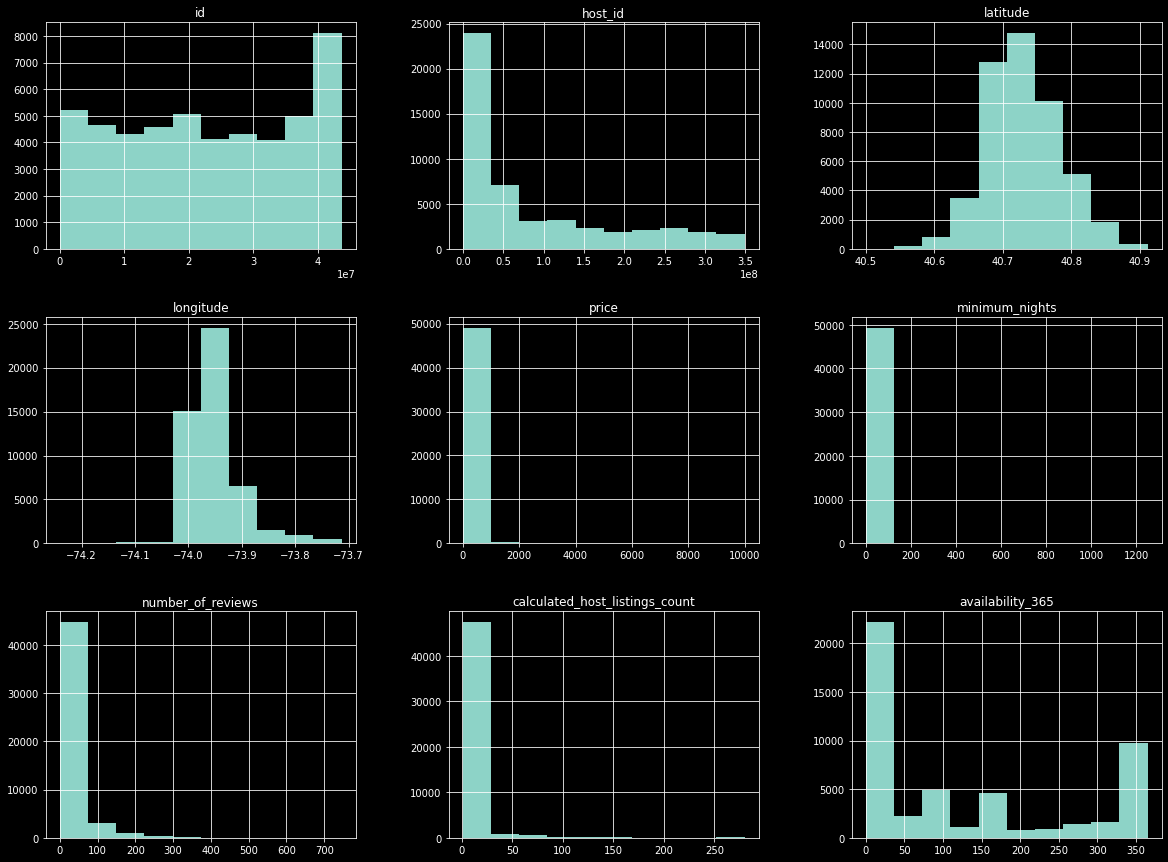

In [ ]:
# verificando as distribuições de todas as variáveis
df.hist(figsize=(20,15));

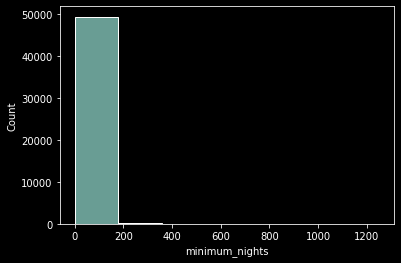

In [ ]:
#plotando o histograma apenas para a coluna minimum_nights
sns.histplot(data=df, x="minimum_nights", bins=7);

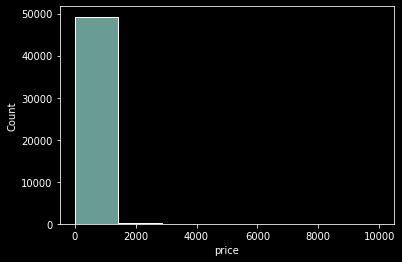

In [ ]:
#plotando o histograma apenas para a coluna price
sns.histplot(data=df, x="price", bins=7);

**Verificando os histogramas, conseguimos visualizar os outliers presentes**

<p align="center"><img src="https://raw.githubusercontent.com/paulosrl/imagens/master/histogramasNY.png
"></p>



### **Calculando o valor de IQR para as colunas selecionadas**

Para tratar dos outliers desse conjunto de dados, iremos analisar a **distribuição estatística**, plotar boxplots e calcular os limites (inferior e superior) utilizando a regra da [variação interquartil](https://escoladedados.org/tutoriais/analise-com-estatistica-descritiva-para-leigos/).

**VARIAÇÃO INTERQUARTIL = Q3-Q1**

Onde Q3 (terceiro quartil) representa 75% dos dados e Q1 (primeiro quartil) representa 25% dos dados
# IQR = Q3 - Q1

Tanto o desvio padrão quanto a variância dependem da média, portanto, são afetados por valores extremos. Mas, a Variação interquartil (IQR em inglês), é uma medida de dispersão baseada na mediana, que funciona de maneira muito mais eficiente na presença de outliers, pois é pouco afetada pelo outliers.

A mediana para ser calculada precisa ordenar os dados do menor para o maior, o valor central dos dados é a [mediana](https://colab.research.google.com/drive/1ZK1zqBeBeFJ315yizvAt5UQyc7TNI1yy?authuser=1#scrollTo=hy_i5KpvUlSn).

Passos a seguir antes da remoção dos outliers:

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.

### **Calculando o valor de IQR para a coluna price**

In [ ]:
# identificando os outliers para a variável price
#cálculo do IQR
q3, q1 = np.percentile(df['price'], [75 ,25])
IQR = q3 - q1
#limite inferior é -1.5 vezes o valor do IQR
min = q1 - (IQR*1.5)
#limite superior é +1.5 vezes o valor do IQR
max = q3 + (IQR*1.5)
print('IQR da variável price: ', IQR)
print('Limite inferior de price: ', min)
print('Limite superior de price: ', max)

IQR da variável price:  107.0
Limite inferior de price:  -92.5
Limite superior de price:  335.5


### **Boxplot da coluna price**

Total de linhas do dataset: 49506
Entradas acima de 335.5: 2913
5.88% do dataset


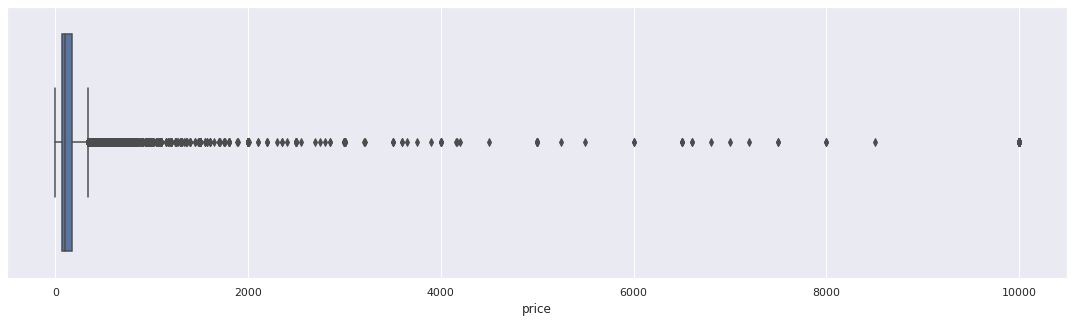

In [ ]:
# Visulizando o boxplot da coluna price
sns.set(rc={'figure.figsize':(19,5)})
sns.boxplot(x="price", data=df);
print("Total de linhas do dataset: "+str(df.shape[0]))
print("Entradas acima de "+str(max)+": "+str(len(df[df.price > max])))
print("{:.2f}% do dataset".format((len(df[df.price >max]) / df.shape[0])*100));

### **Calculando o valor de IQR para a coluna minimum_nights**

In [ ]:
# identificando os outliers para a variável price
#cálculo do IQR
q3, q1 = np.percentile(df['minimum_nights'], [75 ,25])
IQR = q3 - q1
#limite inferior é -1.5 vezes o valor do IQR
min = q1 - (IQR*1.5)
#limite superior é +1.5 vezes o valor do IQR
max = q3 + (IQR*1.5)
print('IQR da variável minimum_nights: ', IQR)
print('Limite inferior de minimum_nights: ', min)
print('Limite superior de minimum_nights: ', max)

IQR da variável minimum_nights:  4.0
Limite inferior de minimum_nights:  -4.0
Limite superior de minimum_nights:  12.0


Total de linhas do dataset: 49506
Entradas acima de 12.0: 8473
17.12% do dataset


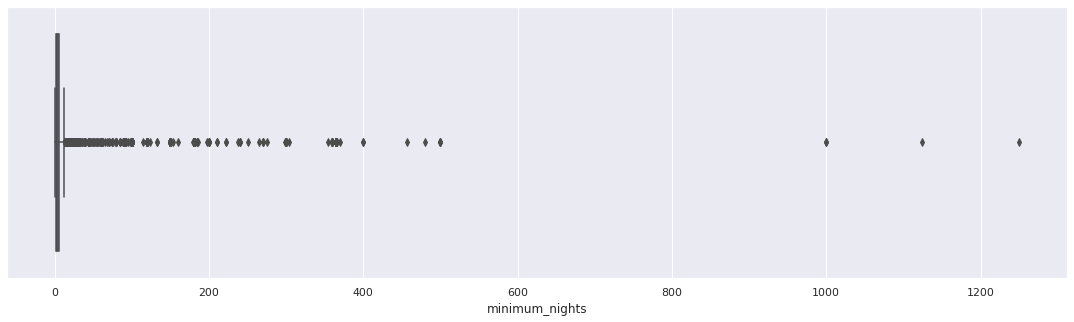

In [ ]:
# Visulizando da coluna minimum_nights
sns.set(rc={'figure.figsize':(19,5)})
sns.boxplot(x="minimum_nights", data=df);
print("Total de linhas do dataset: "+str(df.shape[0]))
print("Entradas acima de "+str(max)+": "+str(len(df[df.minimum_nights > max])))
print("{:.2f}% do dataset".format((len(df[df.minimum_nights >max]) / df.shape[0])*100));

### **Limpando Outliers**

Decidir quais as regras de negócio que irão eliminar os outliers detectados.

Preservar o dataset original para efeito de comparação com o novo dataset que gerá criado após a limpeza dos dados.

Regras:

* para a coluna price, o limite superior calculado é de 335.5, todos os valores acima deste valor serão eliminados da amostra;
* para a coluna price, todos os valores de price iguais a zero também deverão ser eliminados;
* para a coluna minimum_nights, o limite superior calculado é de 12, todos os valores acima deste valor serão eliminados da amostra;


In [ ]:
# limpando o dataset (faz uma cópia do dataset original e armazena em dflimpo)
dflimpo = df.copy()
#o limite superior calculado é de 335.5, todos os valores acima deste valor serão eliminados
dflimpo.drop(dflimpo[dflimpo.price > 335.5].index, axis=0, inplace=True)
#todos os valores de price iguais a zero também deverão ser eliminados
dflimpo.drop(dflimpo[dflimpo.price == 0.0].index, axis=0, inplace=True)
#o limite superior calculado é de 4, todos os valores acima deste valor serão eliminados
dflimpo.drop(dflimpo[dflimpo.minimum_nights > 12].index, axis=0, inplace=True)

print('Linhas antes da limpeza: ', df.shape)
print('Linhas após a limpeza: ',dflimpo.shape)

Linhas antes da limpeza:  (49506, 14)
Linhas após a limpeza:  (38538, 14)


### **Comparando o dataset original com o dataset limpo (sem outliers) utilizando Boxplots**

É possível observar (dataset original) que apesar de não haverem outliers na parte inferior da amostra, existem valores iguais a zero, que precisam ser tratados.

Após a limpeza observa-se que o valor mínino dos dados igual a zero é retirado da amostra e os outliers reduziram de forma considerável.

### **Boxplot da coluna Price (antes e depois)**

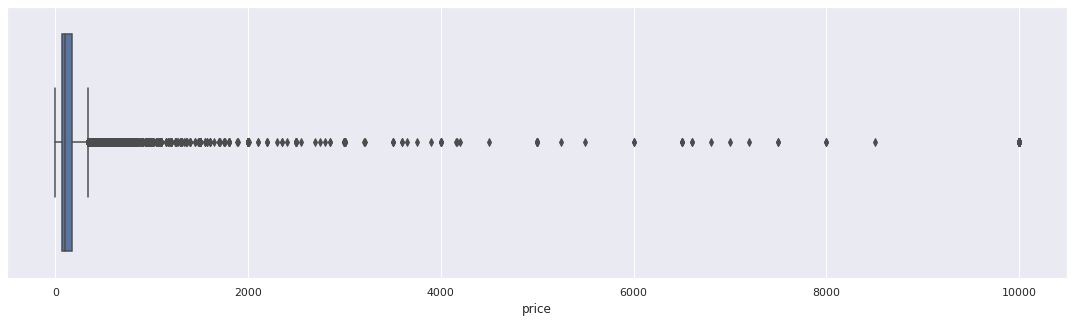

In [ ]:
#boxplot de price antes da limpeza
sns.set(rc={'figure.figsize':(19,5)})
sns.boxplot(x="price", data=df);

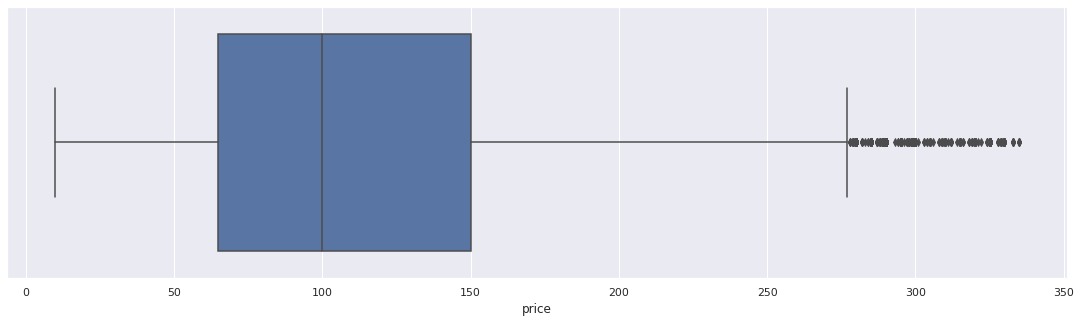

In [ ]:
#boxplot de price após a limpeza
sns.set(rc={'figure.figsize':(19,5)})
sns.boxplot(x="price", data=dflimpo);

### **Histograma da coluna Price (antes e depois)**

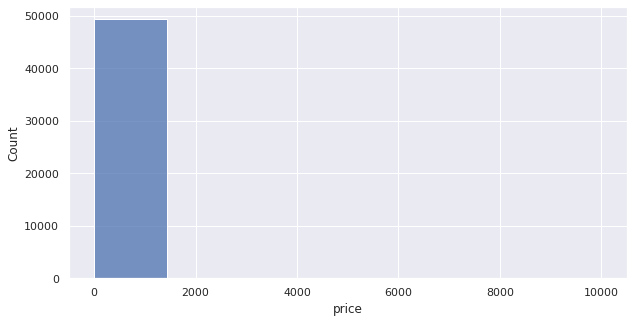

In [ ]:
#histograma apenas para a coluna price antes da limpeza
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=df, x="price", bins=7);

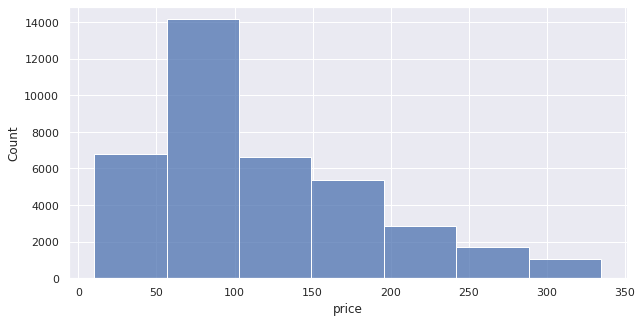

In [ ]:
#histograma para a coluna price após a limpeza
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=dflimpo, x="price", bins=7);

### **Boxplot da coluna minimum_nights (antes e depois)**

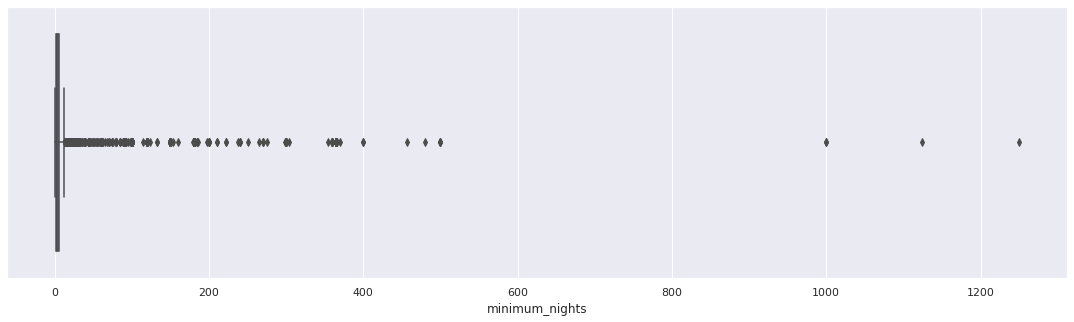

In [ ]:
#boxplot de mini nig antes da limpeza
sns.set(rc={'figure.figsize':(19,5)})
sns.boxplot(x="minimum_nights", data=df);

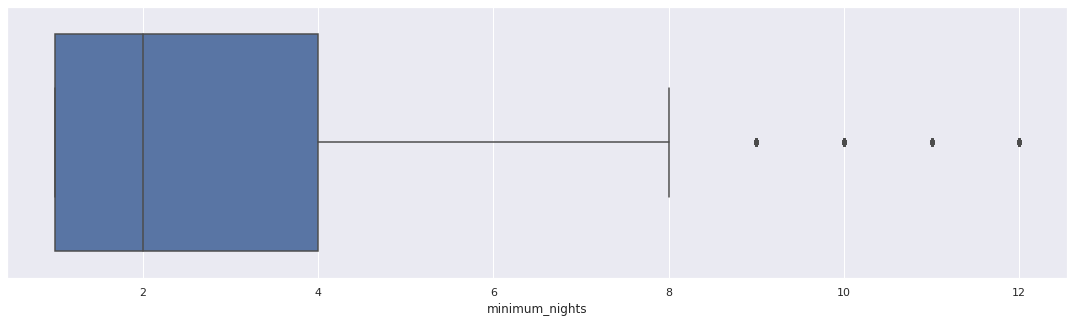

In [ ]:
#boxplot de price após a limpeza
sns.set(rc={'figure.figsize':(19,5)})
sns.boxplot(x="minimum_nights", data=dflimpo);

### **Histograma da coluna minimum_nights (antes e depois)**

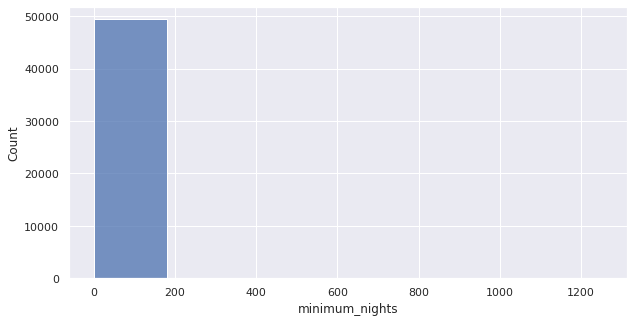

In [ ]:
#histograma apenas para a coluna minimum_nights antes da limpeza
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=df, x="minimum_nights", bins=7);

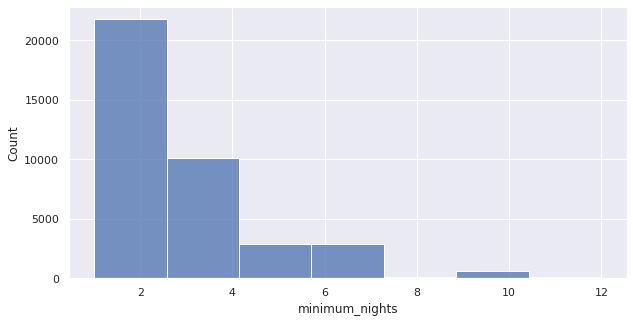

In [ ]:
#histograma apenas para a coluna minimum_nights após a limpeza
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(data=dflimpo, x="minimum_nights", bins=7);

### **Comparando o dataset original com o dataset limpo (sem outliers) utilizando Histogramas**


In [ ]:
# Resumo dos dados
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 335.5".format(len(df[df.price > 335.5])))
print("Representam {:.2f}% do dataframe".format((len(df[df.price > 335.5]) / df.shape[0])*100))
print("Tamanho original: {} colunas".format(df.shape[0]))
print("Tamanho atual: {} colunas".format(dflimpo.shape[0]))

O dataset possui 49506 colunas
2913 Entradas acima de 335.5
Representam 5.88% do dataframe
Tamanho original: 49506 colunas
Tamanho atual: 38538 colunas


### **Verificando a distribuição estatística dos dados sem os outlier**

In [ ]:
# verificando a distribuição estatística dos dados limpos
#round(1), arredonda as casas decimais para uma unidade
dflimpo.describe().round(2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,38538.00,3.853800e+04,38538.00,38538.00,38538.00,38538.00,38538.00,38538.00,38538.00
mean,22199886.73,8.150133e+07,40.73,-73.95,117.08,2.80,27.41,1.96,108.29
std,13189114.94,9.619907e+07,0.06,0.05,66.21,1.99,51.79,3.27,134.83
min,2060.00,2.259000e+03,40.50,-74.24,10.00,1.00,0.00,1.00,0.00
25%,10231375.50,9.104958e+06,40.69,-73.98,65.00,1.00,1.00,1.00,0.00
50%,21712089.50,3.607123e+07,40.72,-73.95,100.00,2.00,6.00,1.00,32.00
75%,34370895.00,1.305174e+08,40.76,-73.93,150.00,4.00,28.00,2.00,180.00
max,43703359.00,3.490786e+08,40.91,-73.71,335.00,12.00,746.00,83.00,365.00


## **Considerações finais sobre a nova distribuição dos dados**.

* A **mediana** da variável **price** foi pouquíssimo afetada pela limpeza dos **outliers**, mostrando mais uma vez a robustez desse atributo como solução para **dados ausentes**.
* A **média** da variável **price** foi **reduzida** **drásticamente**, enfatizando a **sensibilidade** desse atributo em relação aos **outliers**.

**Média, Mediana e Outlier**

<p align="center"><img src="https://raw.githubusercontent.com/paulosrl/imagens/master/outlier.png
"></p>
